In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [48]:
names = r'$u-\bar{u}$', r'$d-\bar{d}$', r'$s-\bar{s}$', \
        r'$c-\bar{c}$', r'$b-\bar{b}$',\
        r'$g$', \
        r'$u+\bar{u}$', r'$d+\bar{d}$', r'$s+\bar{s}$',\
        r'$c+\bar{c}$', r'$b+\bar{b}$'
data0 = np.loadtxt("build/ic.dat").T
data = np.loadtxt("build/fs.dat").T
z = data[0]

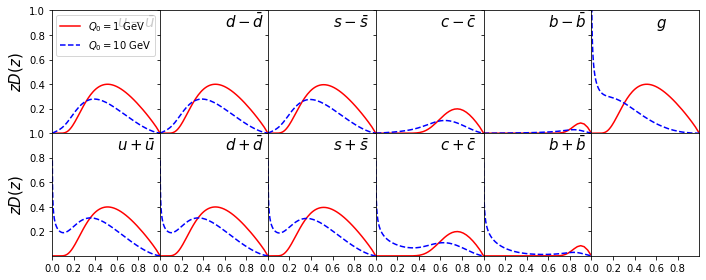

In [49]:
fig, axes = plt.subplots(2,6,figsize=(10,4), sharex=True, sharey=True)

for i, (it,ax) in enumerate(zip(names, axes.flatten()), start=1):
    ax.plot(z, data0[i], 'r-', label=r'$Q_0=1$ GeV')
    ax.plot(z, data[i], 'b--', label=r'$Q_0=10$ GeV')
    #ax.semilogy()
    ax.annotate(it, xy=(.6,.86), xycoords="axes fraction", fontsize=15)
    if ax.is_first_col():
        ax.set_ylabel(r"$zD(z)$", fontsize=15)
    if ax.is_last_col():
        ax.set_xlabel(r"$z$", fontsize=15)
axes[0,0].legend()
ax.set_xlim(0,1)
ax.set_xticks([0,.2,.4,.6,.8])
ax.set_ylim(1e-3,1)
#ax.semilogy()
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

In [38]:
Q2, z, fc = np.loadtxt("build/channel.dat").T

OSError: build/channel.dat not found.

[]

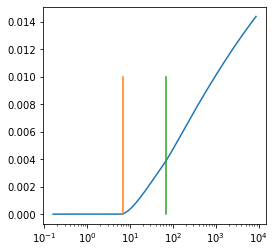

In [333]:
fig, ax = plt.subplots(1,1,figsize=(4,4), sharex=True, sharey=True)
ax.plot(Q2, fc)
ax.plot([4*1.3**2]*2, [0,.01])
ax.plot([4*4.2**2]*2, [0,.01])
#ax.set_xlim(0,120)
ax.semilogx()

In [703]:
def HQET(z, r):
    return r*z*(1-z)**2/(1-(1-r)*z)**6 * (
        6. 
      - 18.*(1.-2*r)*z 
      + (21.-74*r+68*r**2)*z**2
      - 2*(1.-r)*(6-19*r+18*r**2)*z**3
      + 3.*(1.-r)**2 * (1-2*r+2*r**2)*z**4
    )

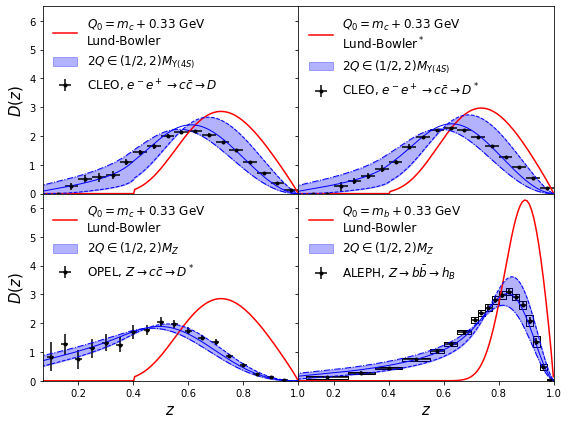

In [81]:
fig, axes = plt.subplots(2,2,figsize=(8,6), sharey=True, sharex=True)
axes = axes.flatten()

ax = axes[0]
x, xl, xh, y, ystat, _ = np.loadtxt("data/c2Dpm.dat").T
norm = .5*((y[1:]+y[:-1])*(x[1:]-x[:-1])).sum()
y /= norm
ystat /= norm
ax.errorbar(x, y, xerr=(xh-xl)/2., yerr=ystat, fmt='k.', label=r'CLEO, $e^-e^+\rightarrow c\bar{c}\rightarrow D$')

Y = []
for f,l,s in zip(['c0d5', 'c', 'c2'],['--','-','-.'],['\\frac{1}{2}','',2]):
    data0 = np.loadtxt("build/{}/ic.dat".format(f)).T
    data = np.loadtxt("build/{}/fs.dat".format(f)).T
    z = data[0]
    lnz = np.log(z)
    y0 = (data0[4]+data0[10])/2
    y1 = (data[4]+data[10])/2
    c = (z[1:]+z[:-1])/2. > 1.8/10.6
    y0 /= .5*((y0[1:]+y0[:-1])[c]*(lnz[1:]-lnz[:-1])[c]).sum()
    y1 /= .5*((y1[1:]+y1[:-1])[c]*(lnz[1:]-lnz[:-1])[c]).sum()
    if f=='c0d5':
        ax.plot(z, y0/z, 'r-', label=r'$Q_0=m_c+0.33$ GeV'+'\nLund-Bowler')
    ax.plot(z, y1/z, 'b'+l, lw=1)
    Y.append(y1/z)
ax.fill_between(z, Y[0], Y[-1], color='b', alpha=.3, label=r'$2Q\in(1/2,2)M_{{\Upsilon(4S)}}$')

ax.set_ylabel(r"$D(z)$", fontsize=15)
ax.set_xlabel(r"$z$", fontsize=15)
ax.legend(framealpha=0, loc='upper left', fontsize=12)
ax.set_xlim(0,1)
ax.set_ylim(0,4)

ax = axes[1]
x, xl, xh, y, ystat, _ = np.loadtxt("data/c2Dstar.dat").T
norm = .5*((y[1:]+y[:-1])*(x[1:]-x[:-1])).sum()
y /= norm
ystat /= norm
ax.errorbar(x, y, xerr=(xh-xl)/2., yerr=ystat, fmt='k.', label=r'CLEO, $e^-e^+\rightarrow c\bar{c}\rightarrow D^*$')

Y = []
for f,l,s in zip(['c2Dstar0d5', 'c2Dstar', 'c2Dstar2'],['--','-','-.'],['\\frac{1}{2}','',2]):
    data0 = np.loadtxt("build/{}/ic.dat".format(f)).T
    data = np.loadtxt("build/{}/fs.dat".format(f)).T
    z = data[0]
    lnz = np.log(z)
    y0 = (data0[4]+data0[10])/2
    y1 = (data[4]+data[10])/2
    c = (z[1:]+z[:-1])/2. > 1.8/10.6
    y0 /= .5*((y0[1:]+y0[:-1])[c]*(lnz[1:]-lnz[:-1])[c]).sum()
    y1 /= .5*((y1[1:]+y1[:-1])[c]*(lnz[1:]-lnz[:-1])[c]).sum()
    if f=='c2Dstar0d5':
        ax.plot(z, y0/z, 'r-', label=r'$Q_0=m_c+0.33$ GeV'+'\nLund-Bowler$^*$')
    ax.plot(z, y1/z, 'b'+l, lw=1)
    Y.append(y1/z)
ax.fill_between(z, Y[0], Y[-1], color='b', alpha=.3, label=r'$2Q\in(1/2,2)M_{{\Upsilon(4S)}}$')

ax.set_xlabel(r"$z$", fontsize=15)
ax.legend(framealpha=0, loc='upper left', fontsize=12)
ax.set_xlim(0,1)
ax.set_ylim(0,4)

ax = axes[2]
x, xl, xh, y, ystat = np.loadtxt("data/OPEL-Zc2D.dat").T
norm = .5*((y[1:]+y[:-1])*(x[1:]-x[:-1])).sum()
y /= norm
ystat /= norm
ax.errorbar(x, y, xerr=(xh-xl)/2., yerr=ystat, fmt='k.', label=r'OPEL, $Z\rightarrow c\bar{c} \rightarrow D^*$')

Y = []
for f,l,s in zip(['Zc0d5', 'Zc', 'Zc2'],['--','-','-.'],['\\frac{1}{2}','',2]):
    data0 = np.loadtxt("build/{}/ic.dat".format(f)).T
    data = np.loadtxt("build/{}/fs.dat".format(f)).T
    z = data[0]
    lnz = np.log(z)
    y0 = (data0[4]+data0[10])/2
    y1 = (data[4]+data[10])/2
    c = (z[1:]+z[:-1])/2. > 1.8/92*2
    y0 /= .5*((y0[1:]+y0[:-1])[c]*(lnz[1:]-lnz[:-1])[c]).sum()
    y1 /= .5*((y1[1:]+y1[:-1])[c]*(lnz[1:]-lnz[:-1])[c]).sum()
    if f=='Zc0d5':
        ax.plot(z, y0/z, 'r-', label=r'$Q_0=m_c+0.33$ GeV'+'\nLund-Bowler')
    ax.plot(z, y1/z, 'b'+l, lw=1)
    Y.append(y1/z)
ax.fill_between(z, Y[0], Y[-1], color='b', alpha=.3, label=r'$2Q\in(1/2,2)M_{Z}$')

#ax.set_ylabel(r"$D_{D/c}(z)$", fontsize=15)
ax.set_xlabel(r"$z$", fontsize=15)
ax.legend(framealpha=0, loc='upper left', fontsize=12)
ax.set_xlim(0,1)
ax.set_ylim(0,4)


ax = axes[3]
x, xl, xh, y, ystat, _, ysys, _ = np.loadtxt("data/ALEPH-b2B.dat").T
ax.errorbar(x, y, xerr=(xh-xl)/2., yerr=ystat, fmt='k.', label=r'ALEPH, $Z\rightarrow b\bar{b} \rightarrow h_B$')
for il, ih, yl, yh in zip(xl,xh,y-ysys,y+ysys):
    ax.fill_between([il,ih],[yl]*2, [yh]*2, edgecolor='k', facecolor='none')

Y = []
for f,l,s in zip(['b0d5', 'b', 'b2'],['--','-','-.'],['\\frac{1}{2}','',2]):
    data0 = np.loadtxt("build/{}/ic.dat".format(f)).T
    data = np.loadtxt("build/{}/fs.dat".format(f)).T
    z = data[0]
    lnz = np.log(z)
    y0 = (data0[5]+data0[11])/2
    y1 = (data[5]+data[11])/2
    c = (z[1:]+z[:-1])/2. > 5.2/92*2
    y0 /= .5*((y0[1:]+y0[:-1])[c]*(lnz[1:]-lnz[:-1])[c]).sum()
    y1 /= .5*((y1[1:]+y1[:-1])[c]*(lnz[1:]-lnz[:-1])[c]).sum()
    if f=='b0d5':
        ax.plot(z, y0/z, 'r-', label=r'$Q_0=m_b+0.33$ GeV'+'\nLund-Bowler')
    ax.plot(z, y1/z, 'b'+l, lw=1)
    Y.append(y1/z)
ax.fill_between(z, Y[0], Y[-1], color='b', alpha=.3, label=r'$2Q\in(1/2,2)M_{Z}$')

#ax.set_ylabel(r"$D_{B/b}(z)$", fontsize=15)
ax.set_xlabel(r"$z$", fontsize=15)
ax.legend(framealpha=0, loc='upper left', fontsize=12)
ax.set_xlim(0.07,1.0)
ax.set_xticks([.2,.4,.6,.8,1.0])
ax.set_ylim(0,6.5)
axes[2].set_ylabel(r"$D(z)$", fontsize=15)
#ax.semilogx()
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.savefig("HF-FF.png", dpi=300)

## 